# Exploratory Data Analysis

In [ ]:
# Function to return Dataframe having images path, class label and type.
def file_dir_df(root):
  '''
  this function will return dataframe which contain path, label and type of images
  '''
  path = []
  label = []
  type = []
  for r, d, f in os.walk(root):
    for file in f:
      if r is not root:
        path.append(r+"/"+file)
        label.append(r.split('/')[1])
        type.append(file.split('.')[1])

  return pd.DataFrame({'path':path,"label":label,"type":type})

In [ ]:
df = file_dir_df('dataset')

In [ ]:
df.head()

,path,label,type
0,dataset/backyard/backyard (534).jpg,backyard,jpg
1,dataset/backyard/backyard (229).jpg,backyard,jpg
2,dataset/backyard/backyard (72).jpg,backyard,jpg
3,dataset/backyard/backyard (503).jpg,backyard,jpg
4,dataset/backyard/backyard (555).jpg,backyard,jpg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5859 entries, 0 to 5858
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    5859 non-null   object
 1   label   5859 non-null   object
 2   type    5859 non-null   object
dtypes: object(3)
memory usage: 137.4+ KB


bedroom       1593
kitchen        992
frontyard      884
livingRoom     852
bathroom       793
backyard       745
Name: label, dtype: int64

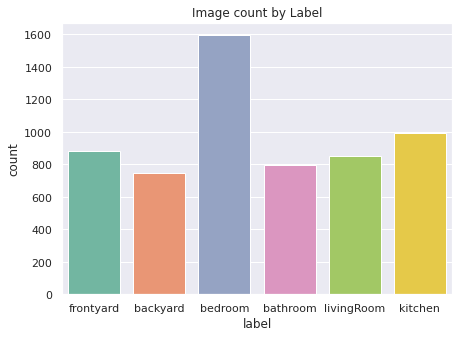

In [ ]:
plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
sns.countplot(data =df, x='label',palette="Set2")
plt.title('Image count by Label')
df['label'].value_counts()

jpg     4246
jpeg    1607
png        5
JPG        1
Name: type, dtype: int64

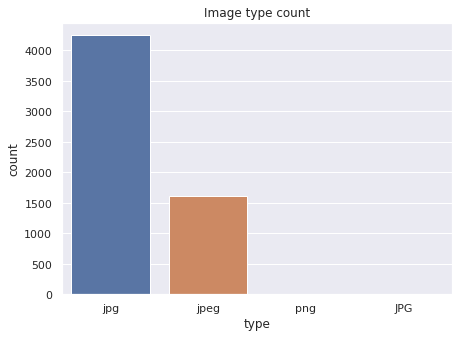

In [ ]:
plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
sns.countplot(data =df, x='type')
plt.title('Image type count')
df['type'].value_counts()

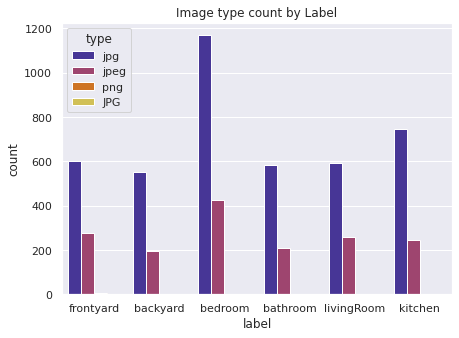

In [ ]:
plt.figure(figsize=(7,5))
sns.set_theme(style="darkgrid")
sns.countplot(data =df, x='label',hue ='type', palette="CMRmap")
plt.title('Image type count by Label')
plt.show()

In [ ]:
# Extracting height and width of images for analysis
height, width = [], []
for image in tqdm(df['path'].values):
  img = cv2.imread(image)
  height.append(img.shape[0])
  width.append(img.shape[1])

  0%|          | 0/5859 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


10% images has height 332.0
20% images has height 333.0
30% images has height 373.0
40% images has height 375.0
50% images has height 375.0
60% images has height 375.0
70% images has height 375.0
80% images has height 375.0
90% images has height 375.0
100% images has height 500.0


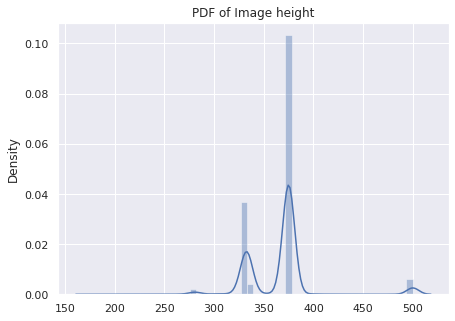

In [ ]:
# Height analysis
plt.figure(figsize=(7,5))
plt.title('PDF of Image height')
sns.set_theme(style="darkgrid")
sns.distplot(height, hist= True)

for i in range(10,101,10):
  print("{}% images has height {}".format(i,np.percentile(height,i)))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


10% images has width 500.0
20% images has width 500.0
30% images has width 500.0
40% images has width 500.0
50% images has width 500.0
60% images has width 500.0
70% images has width 500.0
80% images has width 500.0
90% images has width 500.0
100% images has width 500.0


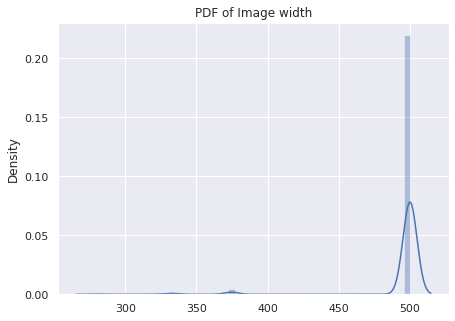

In [ ]:
# Width analysis
plt.figure(figsize=(7,5))
plt.title('PDF of Image width')
sns.set_theme(style="darkgrid")
sns.distplot(width)

for i in range(10,101,10):
  print("{}% images has width {}".format(i,np.percentile(width,i)))

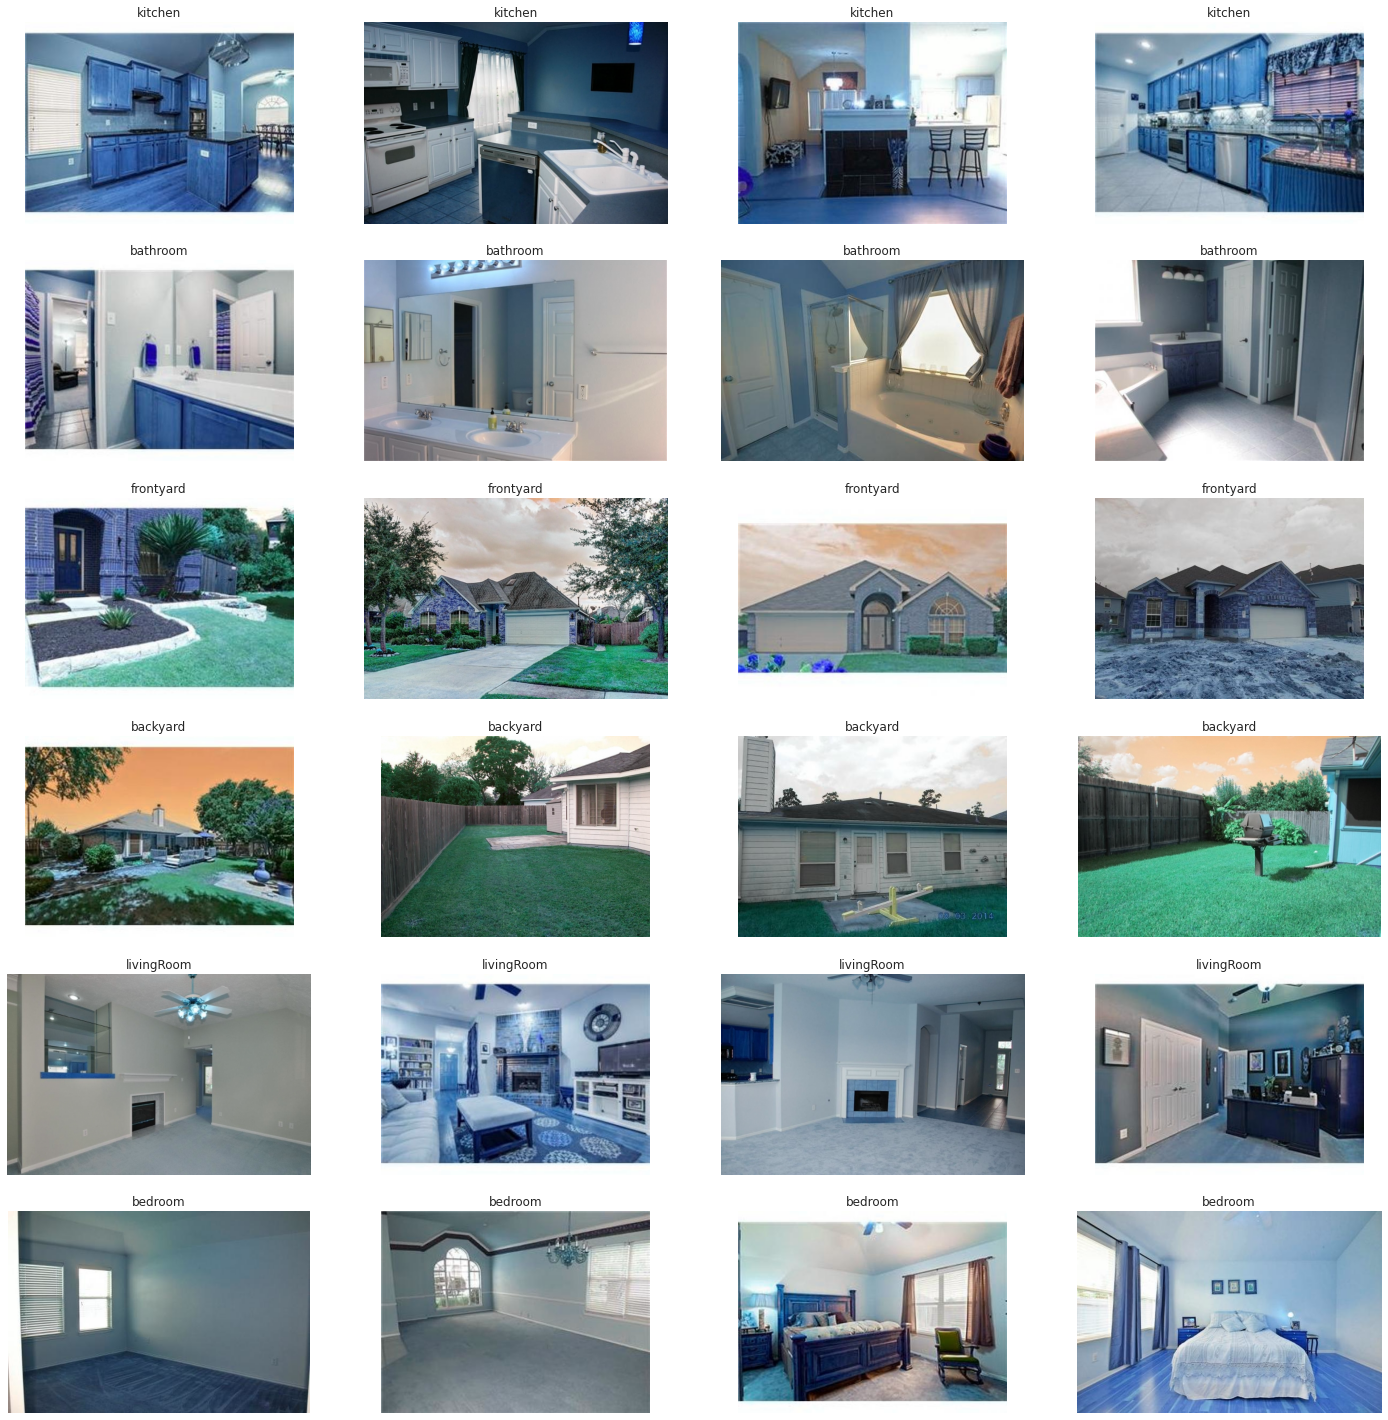

In [ ]:
# visualizing 4 random images from all the classes
fig, ax = plt.subplots(6, 4)
fig.set_size_inches(20,20)
fig.tight_layout()
for i in range(len(ax)):
  row = ax[i]
  label = df['label'].unique()[i]
  temp_df = df[df['label'] == label]
  for col in row:
    num = np.random.randint(0,len(temp_df.values))
    Image = cv2.imread(temp_df.values[num][0])
    col.imshow(Image)
    col.axis('off')
    col.set_title(label)